# Simple Timeseries Modelling 
In this timeseries modelling, I will be using dataset on workers' productivity in a garment industry to attempt to predict productivity.  The data is available from UCI repository

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo

In [3]:
garment_productivity = fetch_ucirepo(id=597)
X = garment_productivity.data.features
y = garment_productivity.data.targets

In [4]:
display(garment_productivity.metadata.additional_info.summary)

'The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.'

In [5]:
display(garment_productivity.variables)

,name,role,type,demographic,description,units,missing_values
0,date,Feature,Date,None,None,None,no
1,quarter,Feature,Categorical,None,None,None,no
2,department,Feature,Categorical,None,None,None,no
3,day,Feature,Categorical,None,None,None,no
4,team,Feature,Integer,None,None,None,no
5,targeted_productivity,Feature,Continuous,None,None,None,no
6,smv,Feature,Continuous,None,None,None,no
7,wip,Feature,Integer,None,None,None,yes
8,over_time,Feature,Integer,None,None,None,no
9,incentive,Feature,Integer,None,None,BDT,no


In [6]:
print(garment_productivity.metadata.additional_info.variable_info)

01	date			:	Date in MM-DD-YYYY
02	day			:	Day of the Week
03	quarter			:	A portion of the month. A month was divided into four quarters
04	department		:	Associated department with the instance
05	team_no			:	Associated team number with the instance
06	no_of_workers		:	Number of workers in each team
07	no_of_style_change	:	Number of changes in the style of a particular product
08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
09	smv			:	Standard Minute Value, it is the allocated time for a task
10	wip			:	Work in progress. Includes the number of unfinished items for products
11	over_time		:	Represents the amount of overtime by each team in minutes
12	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13	idle_time		:	The amount of time when the production was interrupted due to several reasons
14	idle_men		:	The number of workers who were idle due to production interru

In [7]:
X.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0


In [8]:
y.head()

,actual_productivity
0,0.940725
1,0.886500
2,0.800570
3,0.800570
4,0.800382


In [9]:
df = pd.concat([X, y], axis=1)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [10]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [11]:
df.shape

(1197, 15)

**Missing Values**  
Based on the columns information details above for the features, `wip` represents work in progress. It is the only feature with null values. By the description of the column, it can be interpreted that the null values means that there is no work in progress. There is no evidence to this however, it could still be that these values were not recorded at the time. But for the purposes of this time series model, i will fill these as zeros.  To support this proposition, i will only view the sorted values of the column to ensure that there are no zeros recorded in the column. If there are zeros in the column, it would absolutely mean that these values were not recorded but if there is none, then it will further support the essence of filling them with zeros

In [12]:
# viewing first 5 sorted values
df['wip'].sort_values()[:5]

798     7.0
747    10.0
728    11.0
782    12.0
703    13.0
Name: wip, dtype: float64

In [13]:
### filling null values
df.fillna(0, inplace=True)

In [14]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [15]:
df['wip'].sort_values()[:5]

1182    0.0
1173    0.0
1174    0.0
1143    0.0
1148    0.0
Name: wip, dtype: float64

In [16]:
df = df.set_index('date')

In [17]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
df.index

DatetimeIndex(['2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01',
               ...
               '2015-03-11', '2015-03-11', '2015-03-11', '2015-03-11',
               '2015-03-11', '2015-03-11', '2015-03-11', '2015-03-11',
               '2015-03-11', '2015-03-11'],
              dtype='datetime64[ns]', name='date', length=1197, freq=None)

In [20]:
display(df['day'].unique())
df['quarter'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [21]:
df['quarter'] = df['quarter'].str[-1].astype('int64')
### REMEBER THAT FROM THE DESCRIPTION ABOVE, A MONTH IS DIVIDED INTO FOUR QUARTERS. IT DOES NOT REPRESENT YEAR BUT MONTH

In [22]:
### Ordinal encoding of the day and quarter columns
#There are no fridays in the day column
day_cat = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories = [day_cat], dtype='int64')
df['day'] = ord_enc.fit_transform(df[['day']])

In [23]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,1,sweing,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,1,finishing,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2015-01-01,1,sweing,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,1,sweing,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,1,sweing,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [24]:
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [25]:
### converting the deparment column to onehotencoding
df = pd.get_dummies(df, prefix='dept', columns=['department'], dtype='int64')
df.head()

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,dept_finishing,dept_sweing
date,,,,,,,,,,,,,,,
2015-01-01,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0,1
2015-01-01,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,0
2015-01-01,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1
2015-01-01,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1
2015-01-01,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0,1


### Simple TimeSeries Modelling
The data has two unique departments and multiple teams in each department. These could be taken into account to model each department by grouping or clustering.  However, for the purposes of keeping this timeseries simple, i will proceed with resampling the data by day which would then sample the entire department and teams as a single day data. In another notebook, i will be expanding this timeseries to account for these groupings.

In [26]:
df_day_mean = df.resample('D').mean()

In [27]:
df_day_mean.head(2)

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,dept_finishing,dept_sweing
date,,,,,,,,,,,,,,,
2015-01-01,1.0,3.0,6.368421,0.752632,15.000526,546.631579,3972.631579,28.894737,0.0,0.0,0.0,35.473684,0.718711,0.368421,0.631579
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The date 2015-01-02 has NAN values throughout because there is no data collected for Fridays and hence this day will be dropped and then the dataframe will be updated with customfrequency for the day. 

In [28]:
from pandas.tseries.offsets import CustomBusinessDay
custom_freq = CustomBusinessDay(weekmask='Mon Tue Wed Thu Sat Sun')

In [29]:
df_day_mean = df_day_mean[~df_day_mean.index.weekday.isin([4])]

In [30]:
df_day_mean = df_day_mean.asfreq(custom_freq)

In [31]:
df_day_mean.index

DatetimeIndex(['2015-01-01', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-10',
               '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-17', '2015-01-18', '2015-01-19',
               '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-31', '2015-02-01', '2015-02-02',
               '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-07',
               '2015-02-08', '2015-02-09', '2015-02-10', '2015-02-11',
               '2015-02-12', '2015-02-14', '2015-02-15', '2015-02-16',
               '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-21',
               '2015-02-22', '2015-02-23', '2015-02-24', '2015-02-25',
               '2015-02-26', '2015-02-28', '2015-03-01', '2015-03-02',
               '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-07',
      

one more day is missing data and that is `2015-02-21` which happen to be saturday. It is possible that this data was missing in the dataset. However, i will fillforward this missing value from the previous day. 

In [32]:
df_day_mean.loc['2015-02-21']

quarter                 NaN
day                     NaN
team                    NaN
targeted_productivity   NaN
smv                     NaN
wip                     NaN
over_time               NaN
incentive               NaN
idle_time               NaN
idle_men                NaN
no_of_style_change      NaN
no_of_workers           NaN
actual_productivity     NaN
dept_finishing          NaN
dept_sweing             NaN
Name: 2015-02-21 00:00:00, dtype: float64

In [33]:
df_day_mean.ffill(inplace=True)
df_day_mean.loc['2015-02-21']

quarter                     3.000000
day                         3.000000
team                        6.400000
targeted_productivity       0.737500
smv                        16.210000
wip                       486.950000
over_time                3651.000000
incentive                  19.650000
idle_time                   0.425000
idle_men                    1.750000
no_of_style_change          0.500000
no_of_workers              35.900000
actual_productivity         0.689016
dept_finishing              0.400000
dept_sweing                 0.600000
Name: 2015-02-21 00:00:00, dtype: float64

In [34]:
df_day_mean.head(2)

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,dept_finishing,dept_sweing
date,,,,,,,,,,,,,,,
2015-01-01,1.0,3.0,6.368421,0.752632,15.000526,546.631579,3972.631579,28.894737,0.0,0.0,0.0,35.473684,0.718711,0.368421,0.631579
2015-01-03,1.0,5.0,6.333333,0.776190,14.698571,519.714286,5140.000000,25.809524,0.0,0.0,0.0,34.357143,0.802773,0.428571,0.571429


one thing to observe in the data is that because the data has been resampled, some of the columns have lost their meaning because they have been averaged. I will work with columns that still retained their meaning in the dataset.

In [35]:
df_day_mean.shape

(60, 15)

In [36]:
y = df_day_mean.pop('actual_productivity')
X = df_day_mean.drop(['team', 'dept_finishing', 'dept_sweing'], axis=1)

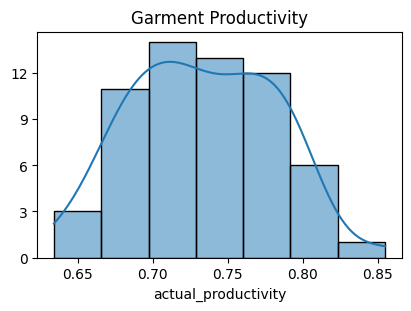

In [37]:
_ = plt.figure(figsize=(4, 3), layout='constrained')
ax = plt.subplot()
sns.histplot(y, ax=ax, kde=True)
ax.set(ylabel='', 
       title='Garment Productivity',
       yticks=(np.arange(0, 15, 3))
      )
plt.show()

#### Computing correlations

In [38]:
import statsmodels.api as sm
from sklearn.metrics import (mean_absolute_error, root_mean_squared_error) 

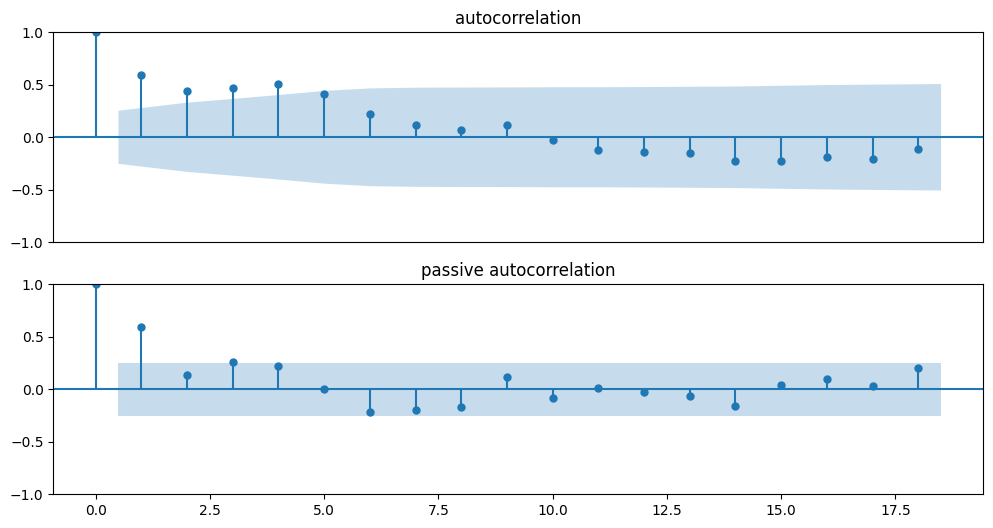

In [39]:
### autocorrelation and passive autocorrelation
_, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 6),sharex=True)
sm.graphics.tsa.plot_acf(y, ax=ax0)
ax0.set(title='autocorrelation',)
ax0.tick_params(axis='x', which='major', length=0, labelbottom=False)

sm.graphics.tsa.plot_pacf(y, ax=ax1)
ax1.set(title='passive autocorrelation')

plt.show()


In [40]:
y_lags = pd.DataFrame(y)
y_lags['lag1'] = y_lags.shift(1)
y_lags.dropna(inplace=True)
y_lags = y_lags.astype('float')

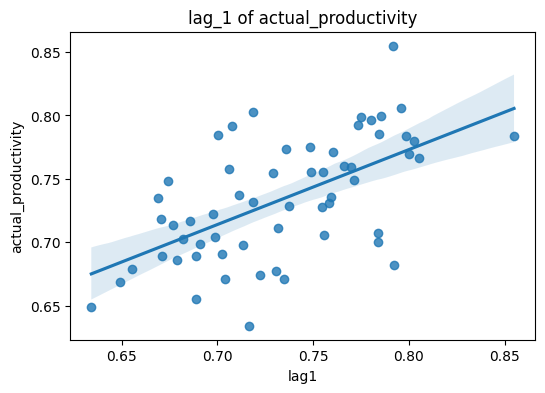

In [41]:
plt.figure(figsize=(6,4))
sns.regplot(data=y_lags, x='lag1', y='actual_productivity')
plt.title('lag_1 of actual_productivity')
plt.show()

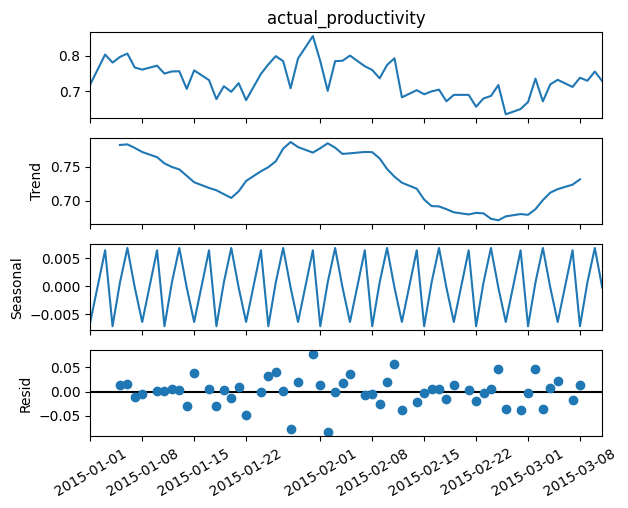

In [42]:
### SEASONAL DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose

y_decompose = seasonal_decompose(y, model='additive', period=6)


y_decompose.plot()
plt.tight_layout()
plt.tick_params(axis='x', labelrotation=30.0)
plt.show()

In [43]:
## Moving average per 6 days
y_df = pd.DataFrame(y)
y_moving_ave= y_df.rolling(window=6, 
                           min_periods=1, 
                           center=True
                          ).mean()
y_moving_ave['step_time'] = np.arange(len(y_moving_ave.index))
y_moving_ave.head()

,actual_productivity,step_time
date,,
2015-01-01,0.767219,0
2015-01-03,0.774421,1
2015-01-04,0.780639,2
2015-01-05,0.778234,3
2015-01-06,0.785171,4


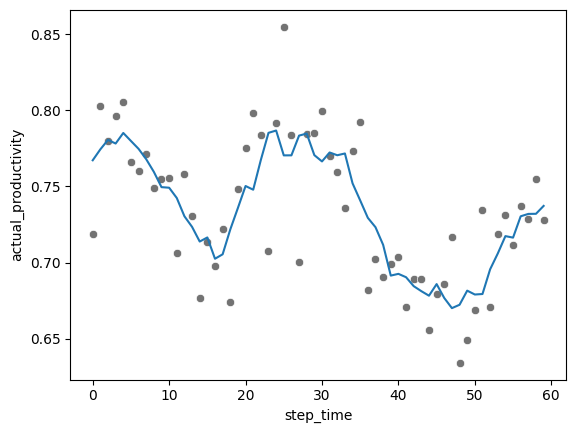

In [44]:
fig, ax = plt.subplots()
sns.scatterplot(data=y_df, y='actual_productivity', x=y_moving_ave['step_time'], ax=ax, color='0.45')
sns.lineplot(data=y_moving_ave, y='actual_productivity', x='step_time', ax=ax)
plt.show()

In [45]:
### checking for stationary in the data
from statsmodels.tsa.stattools import adfuller

In [46]:
adfuller(y)[1]  ### cheking for stationary in y

np.float64(0.40204317679459095)

In [47]:
#Differenceing data and testing for stationary again

y_diff = y.diff(1)
y_dff = y_diff.dropna()

result = adfuller(y_dff)
result[1]

np.float64(1.7509056480190786e-11)

### HoltWinters Exponential Smoothing

In [48]:
### checking for y_df shape and deciding index for trainig
y_df.shape

(60, 1)

In [49]:
indx = 50
gap = 4  # Adding a 4 days gap intentionally between testing and training
y_train, y_test = y_df[:indx], y_df[indx+4:]
display(y_train.shape)
display(y_test.shape)

(50, 1)

(6, 1)

In [50]:
from  statsmodels.tsa.holtwinters import ExponentialSmoothing

In [51]:
model = ExponentialSmoothing(y_train, 
                            trend='add',
                            seasonal='add', 
                            seasonal_periods=6
                            )

exps = model.fit()                        

In [52]:
exps_pred = exps.predict(start=y_test.index[0], end=y_test.index[-1])

exps_pred = pd.Series(exps_pred, index= y_test.index)

In [53]:
def evaluation(y_true, y_pred, estimator):
    mae = mean_absolute_error
    rmse = root_mean_squared_error
    return f"{estimator} error \nMAE: {mae(y_true, y_pred):.3f} \nRMSE: {rmse(y_true, y_pred):.3f}"


In [54]:
print(evaluation(y_test, exps_pred, 'Exponential Smoothing'))

Exponential Smoothing error 
MAE: 0.093 
RMSE: 0.095


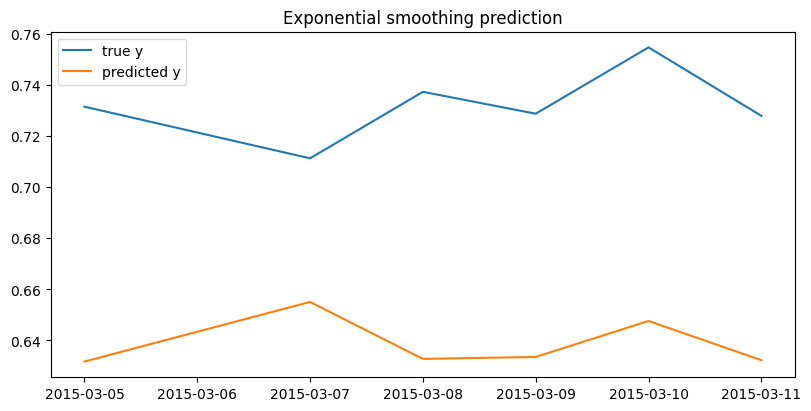

In [55]:
fig, ax = plt.subplots(figsize=(8,4), layout='constrained')
ax.plot(y_test, label='true y')
ax.plot(exps_pred, label='predicted y')
plt.legend()
ax.set_title('Exponential smoothing prediction')
plt.show()

In [56]:
output = 'AIC: {0:0.3f}\nBIC: {1:0.3F}'
print('Exponetial smoothing summary\n'+output.format(exps.aic, exps.bic))

Exponetial smoothing summary
AIC: -311.779
BIC: -292.659


The exponential smoothing model prediction is below the true productivity as seen from teh plot.   
I will also model the data using other estimators to see the best performing among them. 

### Automatic Regression

In [57]:
from statsmodels.tsa.ar_model import AutoReg

In [58]:
### creating exogenous variables for y_train and test
X.head(3)

,quarter,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
date,,,,,,,,,,,
2015-01-01,1.0,3.0,0.752632,15.000526,546.631579,3972.631579,28.894737,0.0,0.0,0.0,35.473684
2015-01-03,1.0,5.0,0.776190,14.698571,519.714286,5140.000000,25.809524,0.0,0.0,0.0,34.357143
2015-01-04,1.0,6.0,0.776190,15.725238,539.285714,4667.142857,27.809524,0.0,0.0,0.0,34.404762


In [59]:
## Scalling the exogenous variables
# although this is not a necessary requirement for this modeling, the scale of the variables are very disproportionate
## therefore the scaling the regressors will minimize the inbalance of scale of variables likely to be introduced to the model

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## spliting the data as was done for y but without gap due to forecast method of AutoReg
indx = 54

y_train, y_test = y_df[:indx], y_df[indx:]
display(y_train.shape)
display(y_test.shape)

X_train, X_test = X[:indx], X[indx:]
display(X_train.shape)
display(X_test.shape)

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

(54, 1)

(6, 1)

(54, 11)

(6, 11)

In [60]:
model = AutoReg(endog=y_train, 
             lags=[1, 2, 3 ], 
             trend='t', 
             exog=X_scaled_train, 
            )
ar_model = model.fit()

In [61]:
output = 'AIC: {0:0.3f}\nBIC: {1:0.3F}'
print('aUtomatic regression summary\n'+output.format(ar_model.aic, ar_model.bic))

aUtomatic regression summary
AIC: -194.063
BIC: -163.154


In [62]:
ar_pred = ar_model.forecast(len(y_test),exog=X_scaled_test)

ar_pred = pd.Series(ar_pred, index=y_test.index)  
ar_pred

date
2015-03-05    0.733793
2015-03-07    0.691690
2015-03-08    0.701289
2015-03-09    1.694282
2015-03-10    1.192986
2015-03-11    1.125230
Freq: C, dtype: float64

In [63]:
print(evaluation(y_test, ar_pred, 'Automatic regression'))

Automatic regression error 
MAE: 0.310 
RMSE: 0.463


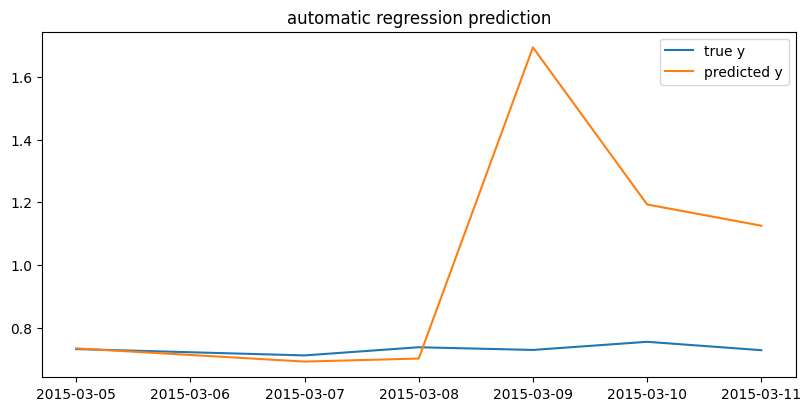

In [64]:
fig, ax = plt.subplots(figsize=(8,4), layout='constrained')
ax.plot(y_test, label='true y')
ax.plot(ar_pred, label='predicted y')
plt.legend()
ax.set_title('automatic regression prediction')
plt.show()

#
The automatic regression prediction has not performed as expected and has failed to capture the trend.  

### Autoregressive distributed lags

In [65]:
from statsmodels.tsa.ardl import ARDL

In [66]:
## Using the same parameters for autoregression 
model3 = ARDL(endog=y_train, 
              exog=X_scaled_train,
              lags=[1, 3, 4,],
              order= 1,
              trend='t' 
             )
ardl = model3.fit()

In [67]:
output = 'AIC: {0:0.3f}\nBIC: {1:0.3F}'
print('ARDL summary\n'+output.format(ardl.aic, ardl.bic))

ARDL summary
AIC: -179.303
BIC: -127.678


In [68]:
ardl_pred = ardl.forecast(len(y_test),exog=X_scaled_test)

ardl_pred = pd.Series(ardl_pred, index=y_test.index)  
ardl_pred

date
2015-03-05    0.731315
2015-03-07    0.689975
2015-03-08    0.722895
2015-03-09    2.726931
2015-03-10    1.569117
2015-03-11    1.166712
Freq: C, dtype: float64

In [69]:
print(evaluation(y_test, ardl_pred, 'Autoregressive distributed lags'))

Autoregressive distributed lags error 
MAE: 0.548 
RMSE: 0.899


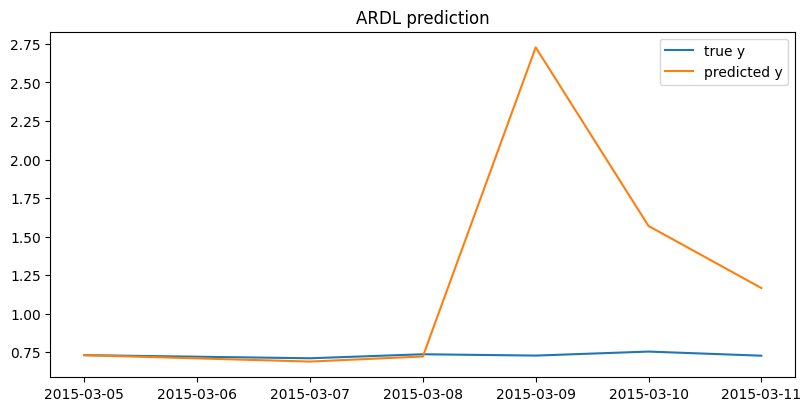

In [70]:
fig, ax = plt.subplots(figsize=(8,4), layout='constrained')
ax.plot(y_test, label='true y')
ax.plot(ardl_pred, label='predicted y')
plt.legend()
ax.set_title('ARDL prediction')
plt.show()

In [71]:
model4 = ARDL(endog=y_train, 
              lags=[1,3, 4, 8, 9],
              trend='t' 
             )
ardl2 = model4.fit()
output = 'AIC: {0:0.3f}\nBIC: {1:0.3F}'
print('ARDL2 summary\n'+output.format(ardl2.aic, ardl2.bic))

ARDL2 summary
AIC: -156.468
BIC: -143.822


In [72]:
ardl_pred2 = ardl2.forecast(len(y_test))

ardl_pred2 = pd.Series(ardl_pred2, index=y_test.index)  
ardl_pred2

date
2015-03-05    0.702709
2015-03-07    0.702556
2015-03-08    0.711629
2015-03-09    0.716014
2015-03-10    0.708489
2015-03-11    0.694256
Freq: C, dtype: float64

In [73]:
print(evaluation(y_test, ardl_pred2, 'ARDL 2'))

ARDL 2 error 
MAE: 0.026 
RMSE: 0.029


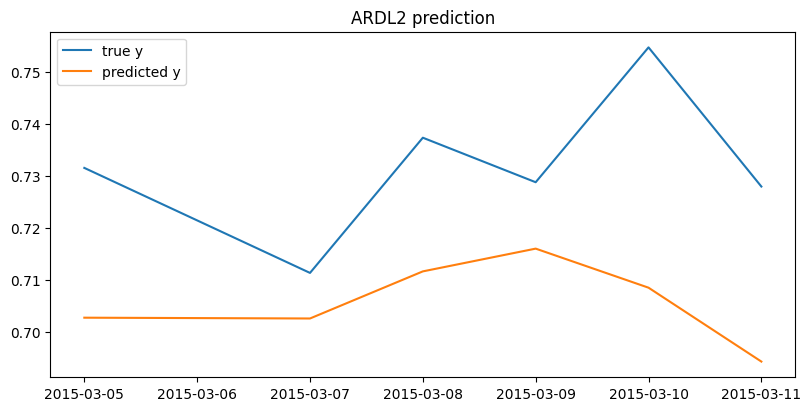

In [74]:
fig, ax = plt.subplots(figsize=(8,4), layout='constrained')
ax.plot(y_test, label='true y')
ax.plot(ardl_pred2, label='predicted y')
plt.legend()
ax.set_title('ARDL2 prediction')
plt.show()

The autoregressive distributed lags performance did not give better predictions either during the forecast. The first ARDL which included exogenous variable and lags followed same trend as the automatic regression predictions and in the second attempt without exogenous variables, the data improved a little but still underfitted the data.

### SARIMAX model

In [75]:
from statsmodels.tsa.api import SARIMAX

In [76]:
model = SARIMAX(endog = y_train, 
                exog=X_scaled_train,
                order=(1, 1, 0), 
                seasonal_order=(0, 0, 0, 6),
                trend='t',
               )
sarimax = model.fit()


print('SARIMAX summary\n'+output.format(sarimax.aic, sarimax.bic))

SARIMAX summary
AIC: -189.954
BIC: -162.370


In [77]:
sarimax_pred = sarimax.forecast(len(y_test), exog=X_scaled_test)
sarimax_pred

2015-03-05    0.695384
2015-03-07    0.665314
2015-03-08    0.682453
2015-03-09    2.156986
2015-03-10    0.703010
2015-03-11    0.713498
Freq: C, Name: predicted_mean, dtype: float64

In [78]:
print(evaluation(y_test, sarimax_pred, 'SARIMAX'))

SARIMAX error 
MAE: 0.272 
RMSE: 0.584


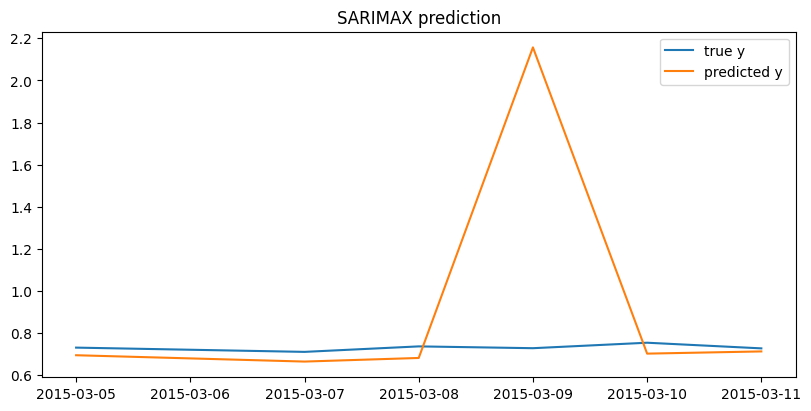

In [79]:
fig, ax = plt.subplots(figsize=(8,4), layout='constrained')
ax.plot(y_test, label='true y')
ax.plot(sarimax_pred, label='predicted y')
plt.legend()
ax.set_title('SARIMAX prediction')
plt.show()

## Conclusion

In this simple time series prediction, i have used exponential smoothing, automatic regression, autoregressive distributed lags and SARIMAX to attempt to predict the next six days productivity of workers in the garment factory.   Overall the models have not performed well at predicting workers productivity compared to the test values although the mean absolute errors and root mean squared errors were relatively low. Based on quantitative evaluation, ARDL estimator 2 performed better than the rest of the models. The exclusion of exogenous variables and addition of more lags perhaps increased the flexibility of the model which gave rise to an improved prediction. However, methods employing regression (AutoReg, ARDL and SARIMAX) have predicted similar productivity which tends to overestimate the actual values. Perhaps because all three methods employ lag order in their model. 

**Next steps**

In another notebook, i will explore more feature_engineering to attempt at predicting more accurately the workers productivity. Given the improved accuracy from ARDL estimator 2 with increased lag values, it will be worth exploring the autoarima method of pmdarima which will provided optimised values for an improved predicition.  I will also explore more methods like VAR, deterministicprocess and fourier transform and potentially other hybrid models for prediction